# Predicting Online Shopper Intent
#### TESTING PHASE
##### Implemented by Jeremia Adriano

### Importing of modules:

In [1]:

from IPython.display import display,HTML
from numpy import *

#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 
import numpy as np

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd

import pickle

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).

 ### Importing data

We will begin with Importing our Testing data which will be used to test our models by performing predictions on the trained models.

In [2]:
column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']

Tx = loadtxt('data/test.dat')
display(pd.DataFrame(Tx,columns = column_labels).head(10))


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,8.0,213.0,2.0,45.0,30.0,2054.0,0.0,0.0,21.0,0.0,12.0,1.0,1.0,6.0,2.0,0.0,0.0,1.0
1,3.0,179.0,0.0,0.0,22.0,746.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,1.0,15.0,2.0,1.0,0.0
2,8.0,410.0,5.0,406.0,24.0,1220.0,0.0,0.0,8.0,0.0,10.0,3.0,2.0,2.0,2.0,2.0,0.0,1.0
3,4.0,157.0,0.0,0.0,20.0,834.0,0.0,0.0,4.0,0.0,12.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0
4,3.0,81.0,0.0,0.0,94.0,2487.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,6.0,2.0,0.0,0.0,0.0
5,8.0,139.0,0.0,0.0,49.0,3346.0,0.0,0.0,12.0,0.0,11.0,2.0,6.0,1.0,2.0,2.0,0.0,0.0
6,1.0,53.0,0.0,0.0,10.0,1331.0,0.0,0.0,49.0,0.0,5.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0
7,11.0,456.0,1.0,13.0,89.0,1904.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,4.0,3.0,2.0,0.0,0.0
8,2.0,561.0,2.0,31.0,95.0,4817.0,0.0,0.0,50.0,0.0,11.0,1.0,1.0,5.0,2.0,2.0,0.0,1.0
9,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0


### Reshape the Testing data:

In [3]:
DataIn = Tx

#Set m and n
m = DataIn.shape[0]
n = DataIn.shape[1]-1 #The final column is not a feature; it's the target variable


#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = DataIn[:,0:n]
y = DataIn[:,n].reshape(m,1)

### Feature Scaling 

The datasets contain features that are highly varying in magnitudes, units and range. And since most Machine Learning algorithms use Eucledian Distance between two data points in their computations, this becomes a problem.

These algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, e.g 5kg and 5000gms. The features with higher magnitudes will weigh in a lot more in the distance calculations compared to features with low magnitudes.

To suppress this effect, we need to reduce all features to the same level of magnitudes. This can be achieved by __scaling__ and in this case, StandardScaler was used.

### How is the  StandardScaler achieved 

The standard score of a sample x is calculated as:

```z = (x - u) / s```

   > where ```u``` is the __mean__ of the training samples or zero if __with_mean=False__

   > ```s``` is the __standard deviation__ of the training samples or one if __with_std=False__.

In [4]:
from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None
    
    #FILL IN BELOW:
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #STOP FILLING IN HERE
    
    return X_scaled,scaler


X_scaled,scalerpt1 = getScaledX(X)


## Support Vector Machine Implementation:

### Load the trained SVM Model:

The final SVM model was trained using different 8 cost functions and also 8 gammas in order to obtain the best combination to be able to find the best CV accuracy. Note that all the gammas and cost functions were given in the project discription. 

The trained model can be loaded using the ```pickle``` library.

In [7]:
from sklearn.svm import SVC

pkl_filename = "model/svm_model.pkl"

with open(pkl_filename, 'rb') as file:
    svm = pickle.load(file)

#### Testing the SVM model

Now we'll get the confusion matrix from the ```sklearn.metrics``` library's ```confusion_matrix``` function and record the results for later analysis:

In [8]:
def SVMTest(X):
    test = svm.predict(X)
    return test

predicted = SVMTest((X_scaled))
acc1 = accuracy_score(y, predicted)*100
cm1 = confusion_matrix(y, predicted)
ttl1 = 'SVM RBF Kernel Confusion Matrix - Test Data \n With accuracy score of:  '

In [9]:
import sklearn.metrics as sklm

def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y, predicted)
SVMresult = [accskl*100,recskl*100,precskl*100,f1skl*100]

## <font color = black> Neural Network Implementation: </font>

### Load the trained Neural Network Model:

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. For instance, the patterns for this project comprise a list of quantities for online purchasing indicators for a online website; potential outputs are either "purchase made" or "purchase not made".

5 different Neural Networks all with a different number of ```hidden nodes``` in their (one and only) Hidden Layer ranging from 3 - 15 nodes was tested and the one that produced the highest CV accuracy was chosen.


The trained model can be loaded using the ```pickle``` library.

In [10]:
pkl_filename = "model/nn_model.pkl"

with open(pkl_filename, 'rb') as file:
    mlp = pickle.load(file)

#### Testing the model
We then made use of the testing data to make predictions and the results were stored for later analysis.

In [11]:
def NNTest(X):
    test = mlp.predict(X_scaled)
    return test

test = NNTest(X)
cm2 = confusion_matrix(y,test)
    
score2 = accuracy_score(y,test)*100
NNresult = [accuracy_score(y,test)*100,recall_score(y,test)*100,precision_score(y,test)*100,f1_score(y,test)*100]
ttl2 = 'Neural Network Confusion Matrix - Test Data \n With accuracy score of:  '
  

## <font color = black> Logistic Regression Implementation: </font>

### Load the trained Logistic Regression Model:

7 different models were trained, each with a different regularization paramter which was denoted as parameter C. Note that parameter ``C = 1/λ``. The model that produced the highest CV accuracy was chosen.

The trained model can be loaded using the ```pickle``` library.

In [12]:
pkl_filename = "model/logreg_model.pkl"
with open(pkl_filename, 'rb') as file:
    LogReg = pickle.load(file)

#### Testing the model

In [13]:
def LogTest(X):
    test = LogReg.predict(X)
    return test

y_pred_test = LogTest(X_scaled)
acc3 = accuracy_score(y,LogReg.predict(X_scaled))*100
cm3 = confusion_matrix(y,y_pred_test)
ttl3 = 'Logistic Regression Confusion Matrix - Test Data \n With accuracy score of:  '

Logresult = [accuracy_score(y,y_pred_test)*100,recall_score(y,y_pred_test)*100,precision_score(y,y_pred_test)*100,f1_score(y,y_pred_test)*100]

## OBTAINING THE CONFUSION MATRIX AND VISUALIZING IT 

Now we will compare the results for the 3 varying Classifiers. 

Note the Confusion Matrix is printed in the format ```[[TN,FP],[FN,TP]]```

If Negative is 1 and Positive is 0 then:

    True Negative: Represent a number of datasets that were actually = 0 and the Classifier predicted = 0
    False Postive: Represent a number of datasets that were actually = 0 and the Classifier predicted = 1
    False Negative: Represent a number of datasets that were actually = 1 and the Classifier predicted = 0
    True Positive: Represent a number of datasets that were actually = 1 and the Classifier predicted = 1


In [14]:
import matplotlib.pyplot as plt
#Graph defined to draw the respective Confusion Matrices
def draw_graph(cm,ttl,acc): 
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(ttl + str(round(acc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

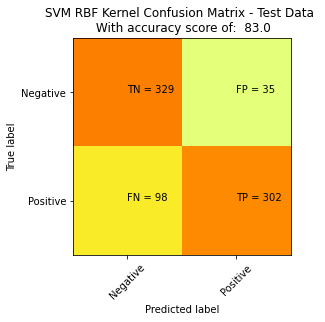

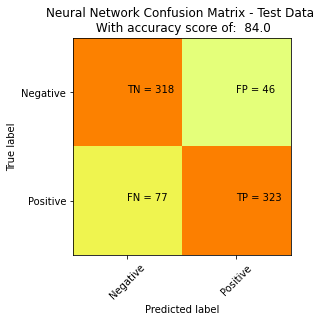

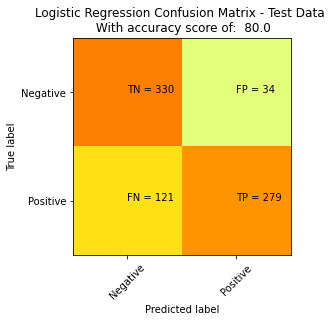

In [15]:
draw_graph(cm1,ttl1,acc1)
draw_graph(cm2,ttl2,score2)
draw_graph(cm3,ttl3,acc3)

## Testing Metrics: Accuracy, Recall, Precision and Score:

### Accuracy

Accuracy - is defined as the ratio of correctly predicted examples by the total examples. One may think that, if a model has a high accuracy then the model is best. Yes, accuracy is an outstanding measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.It can be calculated using the following formula: 
$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}\times100
$$

Similarly, Accuracy can be calculated using the built in function '```accuracy_score(y,x)```' from the ```SKLearn library````

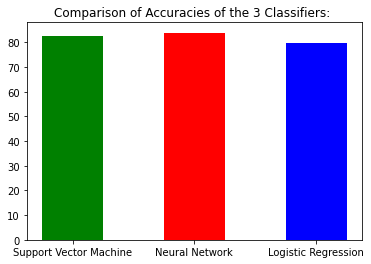


From the graph above we can see that:

 	 	Support Vector Machine has an Accuracy of 83.0%

 	 	Neural Network has an Accuracy of 84.0%

 	 	Logistic Regression has an Accuracy of 80.0%


In [16]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[0],NNresult[0],Logresult[0]]

plt.title("Comparison of Accuracies of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Accuracy of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Accuracy of " + str(round(temp[2])) +"%")

Having a high accuracy doesnt mean the model is the best hence other parameters have to be taken to consideration. 

## Precision

Precision — Also called Positive predictive value. It is the ratio of correct positive predictions to the total predicted positives. A high Precision indicates   It is calculated using the following formula:
$$
\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}\times100
$$

Similarly, Precision can be calculated using the built in function '```precision_score(y,x)```' from the ```SKLearn library```.

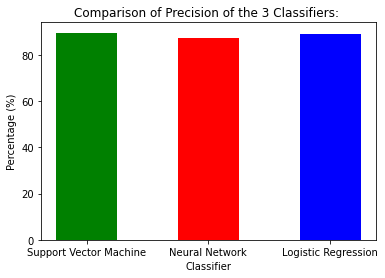


From the graph above we can see that:

 	 	Support Vector Machine has an Precision of 90.0%

 	 	Neural Network has an Precision of 88.0%

 	 	Logistic Regression has an Precision of 89.0%


In [17]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[2],NNresult[2],Logresult[2]]

plt.title("Comparison of Precision of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Precision of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Precision of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Precision of " + str(round(temp[2])) +"%")

Precision answers the question of all customers that were ```predicted``` as made a purchase, how many of them ```actually``` made the purchase? Notice that a high precision relates to the low ```False Positive rate```.

## Recall

Recall — Also called Sensitivity, Probability of Detection, True Positive Rate. Recall is the ratio of correct positive predictions to the total positives examples, in this case, testing sample. It is calculated using the following formula:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}\times100
$$

Similarly, Recall can be calculated using the built in function '```recall_score(y,x)```' from the ```SKLearn library```

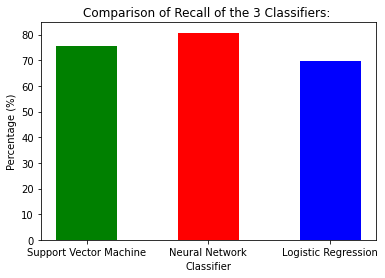


From the graph above we can see that:

 	 	Support Vector Machine has an Recall of 76.0%

 	 	Neural Network has an Recall of 81.0%

 	 	Logistic Regression has an Recall of 70.0%


In [18]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[1],NNresult[1],Logresult[1]]

plt.title("Comparison of Recall of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Recall of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Recall of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Recall of " + str(round(temp[2])) +"%")

Recall addresses the question of all the customers that ```actually``` made a purchase, how many did the classifier ```predict``` correct? A recall above ```0.5``` (50%) is satisfactory.

If Recall and Precision are equal in the case of the Neural Network classifier, since they have the same  denominator, we get:

$$
\text{FP}={\text{FN}}
$$

This means, the classifier has classified an equal amount of users as ```False Positives``` (predicted made a purchase, but actually did not), as it classified ```False Negatives```. This is caused by the fact that the data set had an equal set of customers who made a purchase(expert) and did not make a purchase(non-expert).

## F1 Score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. It is calculated using the formula:

$$
\text{F1 Score} = \frac{2\times\text{Recall}\times\text{Precision}}{\text{Recall}+ \text{Precision}}\times100
$$

Similarly, F1 Score can be calculated using the built in function '```f1_score(y,x)```' from the ```SKLearn library```

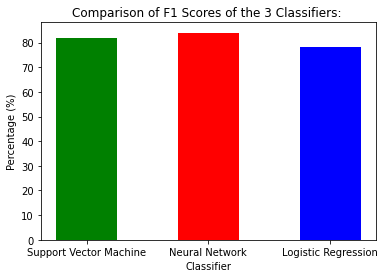


From the graph above we can see that:

 	 	Support Vector Machine has an F1 Score of 82.0%

 	 	Neural Network has an F1 Score of 84.0%

 	 	Logistic Regression has an F1 Score of 78.0%


In [19]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[3],NNresult[3],Logresult[3]]


plt.title("Comparison of F1 Scores of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an F1 Score of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an F1 Score of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an F1 Score of " + str(round(temp[2])) +"%")

# Conclusion

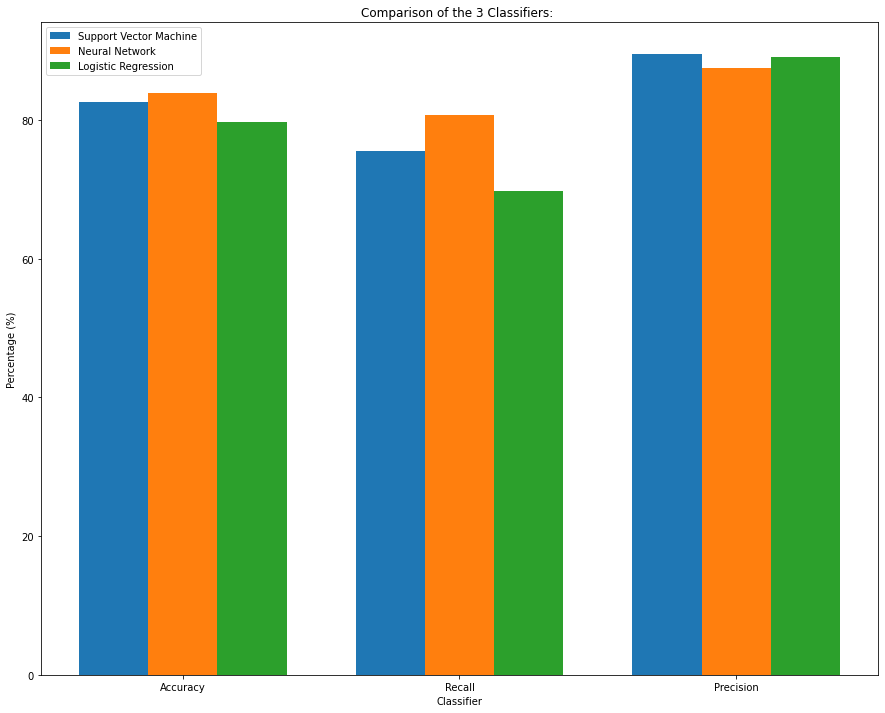

In [20]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"

N = 3
temp1 = [SVMresult[0],SVMresult[1],SVMresult[2]]
temp2 = [NNresult[0],NNresult[1],NNresult[2]]
temp3 = [Logresult[0],Logresult[1],Logresult[2]]

figsize = (10,5)
fig, ax = plt.subplots(figsize = (15,12))
ind = np.arange(N)
width = 0.25
p1 = ax.bar(ind, temp1,width, bottom = 0)
p2 = ax.bar(ind + width, temp2,width, bottom = 0)
p3 = ax.bar((ind +width +width), temp3,width, bottom = 0)
ax.set_title("Comparison of the 3 Classifiers: ")
ax.set_xticks(ind + width)
ax.set_xticklabels(('Accuracy','Recall','Precision'))
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Classifier")
ax.legend((p1[0],p2[0],p3[0]),(titles))
ax.autoscale_view()
plt.show()

Thus inorder to choose the suitable classifier, one needs to assess the application at hand. We were instructed to create classifiers that could predict whether online customers/visitors would make a purchase on the said website based on various data statistics. Thus inorder to choose a model that will predict correctly and confidently, the model with the highest ```Precision``` would be suitable. On the other hand, if a  model that can ensure that all customers/visitors who will make purchases are captured or recorded, then the model with the highest ```Recall``` would be suitable.
